# Project 4
______

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno


### Covid surveillance data

In [5]:
#setting options to be able to see whole text in dataframe columns
pd.set_option("display.max_rows", None, "display.max_columns", None)
pd.set_option('max_colwidth',800)

In [10]:
url='https://drive.google.com/file/d/1xG00fJ1SiCvoNeMqU6dsLW84wZlF0EjU/view?usp=sharing'
dnld_link='https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
print(dnld_link)

https://drive.google.com/uc?export=download&id=1xG00fJ1SiCvoNeMqU6dsLW84wZlF0EjU


In [11]:
df_surv=pd.read_csv(dnld_link)

In [12]:
df_surv.head()

,Unnamed: 0,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,case_positive_specimen,case_onset_interval,underlying_conditions_yn
0,0,2021-01,AZ,4,MARICOPA,4013.0,18 to 49 years,Female,White,Hispanic/Latino,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Missing,NaN,NaN,NaN
1,1,2021-09,IL,17,NaN,NaN,0 - 17 years,Female,White,Non-Hispanic/Latino,Missing,Missing,Probable Case,Missing,Missing,Missing,Missing,0.0,0.0,NaN
2,2,2022-07,IL,17,COOK,17031.0,50 to 64 years,Female,White,Non-Hispanic/Latino,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Missing,1.0,0.0,NaN
3,3,2021-05,FL,12,MIAMI-DADE,12086.0,50 to 64 years,Female,White,Hispanic/Latino,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,NaN,0.0,NaN
4,4,2021-07,CA,6,LOS ANGELES,6037.0,18 to 49 years,Female,Asian,Non-Hispanic/Latino,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,Missing,NaN,0.0,NaN


In [13]:
df_surv.shape

(700000, 20)

In [14]:
df_surv.isnull().sum()

Unnamed: 0                       0
case_month                       0
res_state                        0
state_fips_code                  0
res_county                  165283
county_fips_code            165283
age_group                     2378
sex                           5589
race                         74607
ethnicity                    76551
process                          0
exposure_yn                      0
current_status                   0
symptom_status                   0
hosp_yn                          0
icu_yn                           0
death_yn                      3211
case_positive_specimen      511892
case_onset_interval         351219
underlying_conditions_yn    696588
dtype: int64

In [15]:
# Dropping state_fips_code, county_fips_code, case_positive_specimen
df_surv.drop(columns=['state_fips_code', 'county_fips_code', 'case_positive_specimen'], inplace=True)

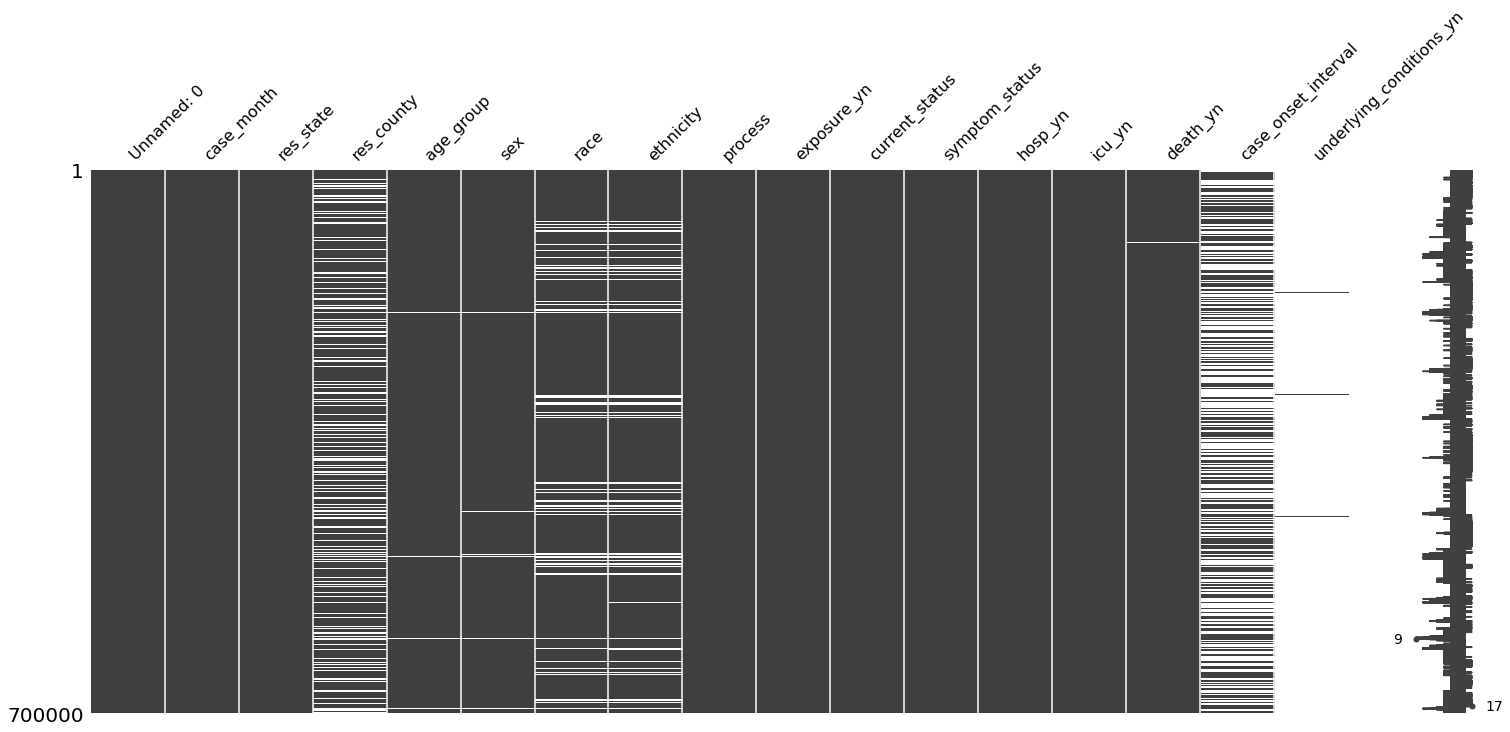

In [16]:
msno.matrix(df_surv);

In [189]:
df_surv.isnull().sum();

In [190]:
#no. of states in the dataset
len(df_surv['res_state'].unique())

49

In [191]:
df_surv.head()

,case_month,res_state,res_county,age_group,sex,race,ethnicity,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,case_onset_interval,underlying_conditions_yn
0,2021-04,MI,KALAMAZOO,18 to 49 years,Female,Black,Non-Hispanic/Latino,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Unknown,NaN,NaN
1,2020-10,SC,SUMTER,65+ years,Female,White,Non-Hispanic/Latino,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,0.0,NaN
2,2022-05,MN,WASHINGTON,65+ years,Female,White,Non-Hispanic/Latino,Missing,Missing,Probable Case,Missing,Missing,Missing,No,NaN,NaN
3,2022-07,IL,MCLEAN,18 to 49 years,Male,White,Non-Hispanic/Latino,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Missing,0.0,NaN
4,2022-06,AL,JEFFERSON,0 - 17 years,Missing,Missing,Missing,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Missing,NaN,NaN


In [15]:
df_surv.tail();

The surveillance data is from January 2020 to September 2022

In [192]:
df_surv.dtypes

case_month                   object
res_state                    object
res_county                   object
age_group                    object
sex                          object
race                         object
ethnicity                    object
process                      object
exposure_yn                  object
current_status               object
symptom_status               object
hosp_yn                      object
icu_yn                       object
death_yn                     object
case_onset_interval         float64
underlying_conditions_yn     object
dtype: object

In [193]:
df_surv['current_status'].value_counts()

Laboratory-confirmed case    665335
Probable Case                134665
Name: current_status, dtype: int64

In [194]:
df_surv['age_group'].value_counts()

18 to 49 years    418448
50 to 64 years    142699
0 - 17 years      131682
65+ years          95435
Missing             7241
Name: age_group, dtype: int64

In [195]:
df_surv['ethnicity'].value_counts()

Non-Hispanic/Latino    412730
Unknown                154741
Missing                 57129
Hispanic/Latino         53904
Name: ethnicity, dtype: int64

In [196]:
df_surv['race'].value_counts()

White                                     419111
Unknown                                   105847
Black                                      73928
Missing                                    64941
Asian                                      13771
Multiple/Other                             12538
American Indian/Alaska Native               6078
Native Hawaiian/Other Pacific Islander        23
Name: race, dtype: int64

In [197]:
df_surv['process'].value_counts()

Missing                            769484
Clinical evaluation                 14733
Laboratory reported                  7490
Routine surveillance                 2582
Unknown                              1530
Contact tracing of case patient      1519
Multiple                             1370
Other                                 741
Provider reported                     548
Routine physical examination            2
Autopsy                                 1
Name: process, dtype: int64

In [198]:
df_surv['exposure_yn'].value_counts()

Missing    745376
Yes         36729
Unknown     17895
Name: exposure_yn, dtype: int64

In [199]:
df_surv['symptom_status'].value_counts()

Missing         386255
Symptomatic     305819
Unknown          99188
Asymptomatic      8738
Name: symptom_status, dtype: int64

In [200]:
df_surv['hosp_yn'].value_counts()

Missing    362189
No         259349
Unknown    155974
Yes         22488
Name: hosp_yn, dtype: int64

In [201]:
df_surv['icu_yn'].value_counts()

Missing    661102
Unknown    118158
No          19502
Yes          1238
Name: icu_yn, dtype: int64

In [202]:
df_surv['death_yn'].value_counts()

Missing    361230
No         281251
Unknown    126200
Yes          3336
Name: death_yn, dtype: int64

In [203]:
df_surv['underlying_conditions_yn'].value_counts()

Yes    25772
No       607
Name: underlying_conditions_yn, dtype: int64

In [28]:
#dropping some more columns
df_surv.drop(columns=['process','exposure_yn','case_onset_interval','underlying_conditions_yn'], inplace=True)

In [29]:
df_surv_master=df_surv.copy()

In [30]:
df_surv.isnull().sum()

case_month            0
res_state             0
res_county          871
age_group          3024
sex                7959
race              64748
ethnicity         75698
current_status        0
symptom_status        0
hosp_yn               0
icu_yn                0
death_yn          18368
dtype: int64

In [31]:
# df_surv.to_csv('../data/clean_data/covid_surveillance_clean.csv', index=False)

In [32]:
#Dropping county

df_surv.drop(columns=['res_county'], inplace=True)

In [33]:
df_surv.dropna(inplace=True)

In [34]:
df_surv.shape

(412936, 11)

In [35]:
df_surv.isnull().sum()

case_month        0
res_state         0
age_group         0
sex               0
race              0
ethnicity         0
current_status    0
symptom_status    0
hosp_yn           0
icu_yn            0
death_yn          0
dtype: int64

In [36]:
#converting case_month to DateTime
df_surv['case_month']=pd.to_datetime(df_surv['case_month'])

In [37]:

list_of_columns_to_survey= df_surv.columns

for col_name in list_of_columns_to_survey:
    print('------  VALUE COUNTS ------------------')
    print(f'Column name: {col_name}')
    print(df_surv[col_name].value_counts())
    print('----------------------------------------')

------  VALUE COUNTS ------------------
Column name: case_month
2022-01-01    79129
2021-12-01    38842
2020-12-01    29308
2021-01-01    25475
2020-11-01    21903
2021-09-01    21459
2022-06-01    19028
2021-08-01    17478
2022-07-01    14882
2022-05-01    14090
2021-11-01    13948
2022-02-01    13371
2022-08-01    12921
2021-10-01     9633
2021-04-01     8362
2021-02-01     8319
2020-10-01     7260
2021-03-01     7239
2022-04-01     6597
2020-07-01     6332
2020-08-01     5967
2020-06-01     4568
2021-07-01     4456
2021-05-01     4182
2022-09-01     3923
2022-03-01     3871
2020-09-01     3673
2021-06-01     1938
2020-04-01     1895
2020-05-01     1839
2020-03-01     1048
Name: case_month, dtype: int64
----------------------------------------
------  VALUE COUNTS ------------------
Column name: res_state
TX    26791
NC    22201
PA    22135
CA    21691
FL    20441
OH    20427
NY    18046
IL    16886
GA    15496
NJ    14973
MI    14185
IN    13972
TN    12669
SC    12567
WI    11388
L

In [38]:
df_surv.head()

,case_month,res_state,age_group,sex,race,ethnicity,current_status,symptom_status,hosp_yn,icu_yn,death_yn
0,2022-05-01,KY,65+ years,Female,White,Non-Hispanic/Latino,Probable Case,Missing,No,Missing,No
1,2022-01-01,WI,50 to 64 years,Male,White,Non-Hispanic/Latino,Laboratory-confirmed case,Missing,Unknown,Missing,Unknown
2,2022-01-01,LA,18 to 49 years,Female,Unknown,Unknown,Laboratory-confirmed case,Unknown,Unknown,Unknown,Missing
4,2021-08-01,NC,0 - 17 years,Female,White,Hispanic/Latino,Probable Case,Symptomatic,No,Unknown,No
5,2021-09-01,AZ,50 to 64 years,Male,American Indian/Alaska Native,Non-Hispanic/Latino,Laboratory-confirmed case,Missing,Missing,Missing,Missing


In [43]:
#setting case_month as index
df_surv.set_index('case_month', inplace=True)

In [44]:
# sorting index
df_surv.sort_index(inplace=True)

In [155]:
def prob_case(groupby_col_name):
    prob_case=pd.DataFrame(df_surv[df_surv['current_status']=='Probable Case'].groupby(groupby_col_name).count().iloc[:,0])
    prob_case.reset_index(inplace=True)
    prob_case.columns=[groupby_col_name,'count']
    return prob_case

In [156]:
def conf_case(groupby_col_name):    
    conf_case=pd.DataFrame(df_surv[df_surv['current_status']=='Laboratory-confirmed case'].groupby(groupby_col_name).count().iloc[:,0])
    conf_case.reset_index(inplace=True)
    conf_case.columns=[groupby_col_name,'count']
    return conf_case

In [153]:
prob_case_sex=prob_case('sex')
prob_case_sex

,sex,count
0,Female,38894
1,Male,32536
2,Missing,426
3,Unknown,1482


In [157]:
conf_case_sex=conf_case('sex')
conf_case_sex

,sex,count
0,Female,178083
1,Male,158977
2,Missing,278
3,Unknown,2260


In [175]:
def bar_plot(df1_x, df1_y,df2_x,df2_y):

    figure, ax=plt.subplots(nrows=1, ncols=2, sharey=True)
    ax[0]=plt.subplot(1,2,1)
    ax[0]=plt.bar( x=df1_x, height=df1_y)
    plt.xticks(rotation=60);
    # plt.ylim(0,250000)

    ax[1]=plt.subplot(1,2,2)
    ax[1]=plt.bar( x=df2_x, height=df2_y)

    plt.xticks(rotation=60);
    # plt.ylim(0,250000);

    plt.subplots_adjust(hspace=0);
    plt.subplots_adjust( wspace=0.1);
    # left=0.2, right=0.9, top=0.9, bottom=0.1,

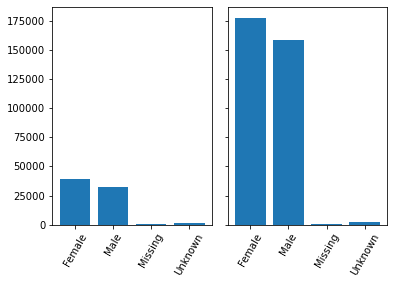

In [176]:
bar_plot(prob_case_sex['sex'], prob_case_sex['count'], conf_case_sex['sex'], conf_case_sex['count'])

In [158]:
prob_case_age =prob_case('age_group')
prob_case_age

,age_group,count
0,0 - 17 years,12677
1,18 to 49 years,41183
2,50 to 64 years,11211
3,65+ years,7192
4,Missing,1075


In [159]:
conf_case_age =conf_case('age_group')
conf_case_age

,age_group,count
0,0 - 17 years,47531
1,18 to 49 years,185349
2,50 to 64 years,61490
3,65+ years,41476
4,Missing,3752


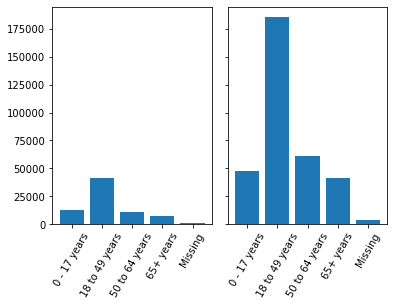

In [177]:
bar_plot(prob_case_age['age_group'], prob_case_age['count'], conf_case_age['age_group'], conf_case_age['count'])

**compare with population percentage of age groups**

In [161]:
prob_case_race = prob_case('race')
prob_case_race

,race,count
0,American Indian/Alaska Native,213
1,Asian,1061
2,Black,6796
3,Missing,5365
4,Multiple/Other,639
5,Native Hawaiian/Other Pacific Islander,31
6,Unknown,11746
7,White,47487


In [162]:
conf_case_race = conf_case('race')
conf_case_race

,race,count
0,American Indian/Alaska Native,3043
1,Asian,5747
2,Black,38417
3,Missing,29650
4,Multiple/Other,3916
5,Native Hawaiian/Other Pacific Islander,100
6,Unknown,48135
7,White,210590


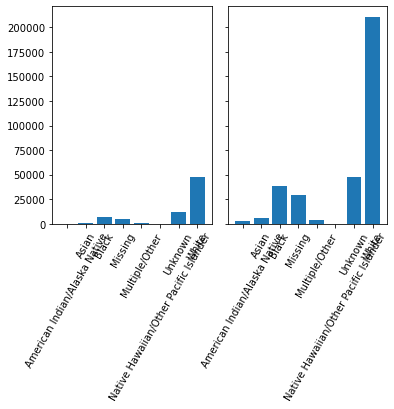

In [178]:
bar_plot(prob_case_race['race'], prob_case_race['count'], conf_case_race['race'], conf_case_race['count'])

In [164]:
prob_case_eth = prob_case('ethnicity')
prob_case_eth

,ethnicity,count
0,Hispanic/Latino,4479
1,Missing,8633
2,Non-Hispanic/Latino,46015
3,Unknown,14211


In [165]:
conf_case_eth = conf_case('ethnicity')
conf_case_eth

,ethnicity,count
0,Hispanic/Latino,27971
1,Missing,24413
2,Non-Hispanic/Latino,216503
3,Unknown,70711


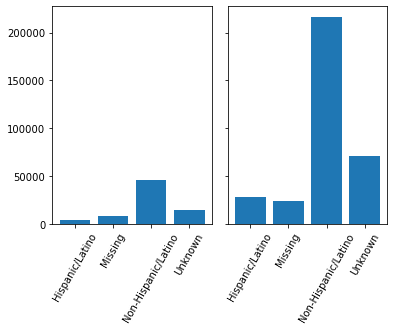

In [179]:
bar_plot(prob_case_eth['ethnicity'], prob_case_eth['count'], conf_case_eth['ethnicity'], conf_case_eth['count'])

In [167]:
prob_case_state=prob_case('res_state')
prob_case_state

,res_state,count
0,AK,51
1,AL,2035
2,AR,1336
3,AZ,1058
4,CA,2537
5,CO,724
6,CT,298
7,DE,290
8,FL,2029
9,GA,4291


In [168]:
conf_case_state=conf_case('res_state')
conf_case_state

,res_state,count
0,AK,1524
1,AL,6132
2,AR,3593
3,AZ,6406
4,CA,19154
5,CO,7116
6,CT,2949
7,DC,374
8,DE,1666
9,FL,18412


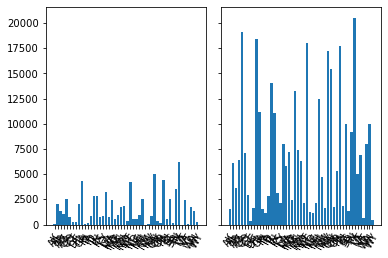

In [180]:
bar_plot(prob_case_state['res_state'], prob_case_state['count'], conf_case_state['res_state'], conf_case_state['count'])

In [268]:
#Help from https://stackoverflow.com/questions/28679930/how-to-drop-rows-from-pandas-data-frame-that-contains-a-particular-string-in-a-p#:~:text=If%20your%20string%20constraint%20is%20not%20just%20one,drop%20all%20rows%20containing%20elements%20of%20your%20list

df_surv1=df_surv[~df_surv.sex.str.contains('|'.join(['Missing','Unknown']))]
df_surv1=df_surv[~df_surv.age_group.str.contains('|'.join(['Missing','Unknown']))]
df_surv1=df_surv[~df_surv.race.str.contains('|'.join(['Missing','Unknown']))]
df_surv1=df_surv[~df_surv.ethnicity.str.contains('|'.join(['Missing','Unknown']))]

In [269]:
df_surv1.shape

(294968, 11)

In [265]:
df_surv1.age_group.value_counts()

18 to 49 years    226532
50 to 64 years     72701
0 - 17 years       60208
65+ years          48668
Name: age_group, dtype: int64

## COVID  cases and deaths by state over time

In [171]:
df_cases=pd.read_csv('../data/United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv')

In [172]:
df_cases.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,01/25/2020,OR,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
1,09/17/2021,MD,"516,784",NaN,NaN,"1,525",0,"10,282","10,056",226,11,0,09/19/2021 12:00:00 AM,NaN,Agree
2,10/12/2021,VT,"33,388",NaN,NaN,112,5,333,NaN,NaN,4,0,10/14/2021 12:00:00 AM,Not agree,Not agree
3,02/01/2021,DC,"37,008",NaN,NaN,136,0,916,NaN,NaN,3,0,02/02/2021 02:51:51 PM,NaN,NaN
4,12/19/2021,NC,"1,586,243","1,339,055","247,188","3,410",466,"19,480","17,148","2,332",19,3,12/19/2021 12:00:00 AM,Agree,Agree


In [173]:
#converting case_month to DateTime
# df_cases['submission_date']=pd.to_datetime(df_cases['submission_date'])

#setting case_month as index
# df_cases.set_index('submission_date', inplace=True)

#sorting index
# df_cases.sort_index(inplace=True)

In [174]:
df_cases.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,01/25/2020,OR,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
1,09/17/2021,MD,"516,784",NaN,NaN,"1,525",0,"10,282","10,056",226,11,0,09/19/2021 12:00:00 AM,NaN,Agree
2,10/12/2021,VT,"33,388",NaN,NaN,112,5,333,NaN,NaN,4,0,10/14/2021 12:00:00 AM,Not agree,Not agree
3,02/01/2021,DC,"37,008",NaN,NaN,136,0,916,NaN,NaN,3,0,02/02/2021 02:51:51 PM,NaN,NaN
4,12/19/2021,NC,"1,586,243","1,339,055","247,188","3,410",466,"19,480","17,148","2,332",19,3,12/19/2021 12:00:00 AM,Agree,Agree


In [176]:
df_cases.tail();

In [177]:
df_cases.shape

(59640, 15)

In [178]:
# This code block will print the value counts for each column in the dataframe

list_of_columns_to_survey= df_cases.columns

for col_name in list_of_columns_to_survey:
    print('------  VALUE COUNTS ------------------')
    print(f'Column name: {col_name}')
    print(df_cases[col_name].value_counts())
    print('----------------------------------------')


------  VALUE COUNTS ------------------
Column name: submission_date
01/25/2020    60
08/20/2021    60
11/22/2020    60
12/23/2021    60
06/26/2022    60
              ..
08/08/2022    60
05/26/2021    60
07/03/2022    60
06/08/2021    60
12/02/2021    60
Name: submission_date, Length: 994, dtype: int64
----------------------------------------
------  VALUE COUNTS ------------------
Column name: state
OR     994
MD     994
AK     994
IN     994
NY     994
PW     994
IA     994
TN     994
HI     994
MA     994
GU     994
MS     994
GA     994
AL     994
RMI    994
OK     994
CO     994
NYC    994
MP     994
OH     994
AS     994
PR     994
SD     994
PA     994
TX     994
ND     994
NM     994
WV     994
WA     994
AR     994
UT     994
KS     994
FSM    994
VT     994
DC     994
NC     994
MI     994
CT     994
SC     994
CA     994
ID     994
IL     994
WY     994
WI     994
NH     994
NV     994
ME     994
MO     994
AZ     994
RI     994
LA     994
VA     994
MN     994
KY     994
N

In [179]:
df_cases.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,01/25/2020,OR,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
1,09/17/2021,MD,"516,784",NaN,NaN,"1,525",0,"10,282","10,056",226,11,0,09/19/2021 12:00:00 AM,NaN,Agree
2,10/12/2021,VT,"33,388",NaN,NaN,112,5,333,NaN,NaN,4,0,10/14/2021 12:00:00 AM,Not agree,Not agree
3,02/01/2021,DC,"37,008",NaN,NaN,136,0,916,NaN,NaN,3,0,02/02/2021 02:51:51 PM,NaN,NaN
4,12/19/2021,NC,"1,586,243","1,339,055","247,188","3,410",466,"19,480","17,148","2,332",19,3,12/19/2021 12:00:00 AM,Agree,Agree


In [180]:
df_cases_master=df_cases.copy()
df_cases=df_cases[['state','tot_cases','new_case','tot_death','new_death']]

In [181]:
df_cases.isnull().sum()

state        0
tot_cases    0
new_case     0
tot_death    0
new_death    0
dtype: int64

In [182]:
df_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59640 entries, 0 to 59639
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   state      59640 non-null  object
 1   tot_cases  59640 non-null  object
 2   new_case   59640 non-null  object
 3   tot_death  59640 non-null  object
 4   new_death  59640 non-null  object
dtypes: object(5)
memory usage: 2.3+ MB


In [197]:
df_cases.to_csv('../data/clean_data/United_States_COVID-19_Cases_and_Deaths_by_State_over_Time_clean.csv', index=False)

### Vaccination trends

In [184]:
df_vacc=pd.read_csv('../data/covid_vaccination_trends.csv', low_memory=False)

In [185]:
df_vacc.shape

(74160, 25)

In [186]:
df_vacc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74160 entries, 0 to 74159
Data columns (total 25 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Date                                         74160 non-null  object 
 1   date_type                                    74160 non-null  object 
 2   MMWR_week                                    74160 non-null  int64  
 3   Location                                     74160 non-null  object 
 4   Administered_Daily                           74160 non-null  object 
 5   Administered_Cumulative                      74160 non-null  object 
 6   Administered_7_Day_Rolling_Average           73140 non-null  object 
 7   Admin_Dose_1_Daily                           74160 non-null  object 
 8   Admin_Dose_1_Cumulative                      74160 non-null  object 
 9   Admin_Dose_1_Day_Rolling_Average             73140 non-null  object 
 10

In [187]:
df_vacc.head()

,Date,date_type,MMWR_week,Location,Administered_Daily,Administered_Cumulative,Administered_7_Day_Rolling_Average,Admin_Dose_1_Daily,Admin_Dose_1_Cumulative,Admin_Dose_1_Day_Rolling_Average,...,Series_Complete_Day_Rolling_Average,Series_Complete_Pop_Pct,Booster_Daily,Booster_Cumulative,Booster_7_Day_Rolling_Average,Additional_Doses_Vax_Pct,Second_Booster_50Plus_Daily,Second_Booster_50Plus_Cumulative,Second_Booster_50Plus_7_Day_Rolling_Average,Second_Booster_50Plus_Vax_Pct
0,10/12/2022,Report,41,DE,"17,883","2,005,782",NaN,"1,841","839,722",NaN,...,NaN,71.7,"2,245","344,388",NaN,49.3,"4,311","96,891",NaN,42.0
1,10/12/2022,Report,41,CT,"5,733","8,273,306",NaN,"5,198","3,534,406",NaN,...,NaN,81.5,"1,052","1,567,645",NaN,54.0,492,"374,525",NaN,40.4
2,10/12/2022,Report,41,CA,"3,409","81,763,386",NaN,"170,547","33,585,368",NaN,...,NaN,74.1,"-130,515","16,291,249",NaN,55.7,"-40,176","3,578,567",NaN,42.9
3,10/12/2022,Report,41,NE,"21,694","3,489,100",NaN,"1,355","1,396,070",NaN,...,NaN,65.2,"1,835","677,307",NaN,53.7,"4,749","161,952",NaN,40.2
4,10/12/2022,Report,41,PW,152,"49,838",NaN,9,"20,625",NaN,...,NaN,85.4,32,"12,133",NaN,66.0,19,"1,194",NaN,24.7


In [188]:
df_vacc.isnull().sum()

Date                                              0
date_type                                         0
MMWR_week                                         0
Location                                          0
Administered_Daily                                0
Administered_Cumulative                           0
Administered_7_Day_Rolling_Average             1020
Admin_Dose_1_Daily                                0
Admin_Dose_1_Cumulative                           0
Admin_Dose_1_Day_Rolling_Average               1020
Administered_Dose1_Pop_Pct                        0
Administered_daily_change_report               6660
Administered_daily_change_report_7dayroll      7740
Series_Complete_Daily                             0
Series_Complete_Cumulative                        0
Series_Complete_Day_Rolling_Average            1020
Series_Complete_Pop_Pct                           0
Booster_Daily                                     0
Booster_Cumulative                                0
Booster_7_Da

In [189]:
df_vacc.dropna(inplace=True)

In [190]:
df_vacc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66420 entries, 7740 to 74159
Data columns (total 25 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Date                                         66420 non-null  object 
 1   date_type                                    66420 non-null  object 
 2   MMWR_week                                    66420 non-null  int64  
 3   Location                                     66420 non-null  object 
 4   Administered_Daily                           66420 non-null  object 
 5   Administered_Cumulative                      66420 non-null  object 
 6   Administered_7_Day_Rolling_Average           66420 non-null  object 
 7   Admin_Dose_1_Daily                           66420 non-null  object 
 8   Admin_Dose_1_Cumulative                      66420 non-null  object 
 9   Admin_Dose_1_Day_Rolling_Average             66420 non-null  object 


In [191]:
df_vacc.head()

,Date,date_type,MMWR_week,Location,Administered_Daily,Administered_Cumulative,Administered_7_Day_Rolling_Average,Admin_Dose_1_Daily,Admin_Dose_1_Cumulative,Admin_Dose_1_Day_Rolling_Average,...,Series_Complete_Day_Rolling_Average,Series_Complete_Pop_Pct,Booster_Daily,Booster_Cumulative,Booster_7_Day_Rolling_Average,Additional_Doses_Vax_Pct,Second_Booster_50Plus_Daily,Second_Booster_50Plus_Cumulative,Second_Booster_50Plus_7_Day_Rolling_Average,Second_Booster_50Plus_Vax_Pct
7740,06/21/2022,Admin,25,ND,509,"1,131,991",438,91,"504,634",74,...,52,56.3,120,"189,296",96,44.1,193,"18,578",177,15.2
7741,06/21/2022,Admin,25,CA,"40,018","77,624,034","35,217","6,980","32,940,724","4,604",...,"3,597",72.9,"11,490","15,518,543","11,000",53.9,"15,935","2,512,239","14,385",31.1
7742,06/21/2022,Admin,25,IA,"2,539","5,276,550","2,036",365,"2,159,525",214,...,186,62.6,484,"1,065,873",418,54.0,"1,408","202,036","1,168",28.8
7743,06/21/2022,Admin,25,AR,"2,027","4,363,089","1,616",356,"2,036,932",295,...,221,55.2,462,"683,622",382,41.1,876,"108,487",677,23.3
7744,06/21/2022,Admin,25,MI,"6,310","16,386,296","5,279",895,"6,743,028",652,...,554,60.8,"1,543","3,360,001","1,328",55.4,"3,132","597,299","2,627",27.7


### convert column (17,18,19,21,22,23) and some others to integer type

In [192]:
df_vacc.shape

(66420, 25)

In [193]:
# This code block will print the value counts for each column in the dataframe

list_of_columns_to_survey= df_vacc.columns

for col_name in list_of_columns_to_survey:
    print('------  VALUE COUNTS ------------------')
    print(f'Column name: {col_name}')
    print(df_vacc[col_name].value_counts())
    print('----------------------------------------')


------  VALUE COUNTS ------------------
Column name: Date
09/16/2021    120
06/13/2021    120
06/19/2021    120
06/18/2021    120
06/17/2021    120
             ... 
06/18/2022     60
06/19/2022     60
06/20/2022     60
06/17/2022     60
06/21/2022     60
Name: Date, Length: 556, dtype: int64
----------------------------------------
------  VALUE COUNTS ------------------
Column name: date_type
Admin     33360
Report    33060
Name: date_type, dtype: int64
----------------------------------------
------  VALUE COUNTS ------------------
Column name: MMWR_week
51    1680
11    1680
1     1680
2     1680
3     1680
4     1680
5     1680
6     1680
7     1680
8     1680
9     1680
10    1680
12    1680
13    1680
14    1680
15    1680
16    1680
17    1680
18    1680
19    1680
20    1680
21    1680
22    1680
23    1680
52    1680
24    1560
25    1020
50     840
49     840
26     840
27     840
28     840
29     840
30     840
31     840
32     840
33     840
34     840
35     840
36     

In [194]:
df_vacc.describe()

,MMWR_week,Administered_Dose1_Pop_Pct,Series_Complete_Pop_Pct,Additional_Doses_Vax_Pct,Second_Booster_50Plus_Vax_Pct
count,66420.000000,66420.000000,66420.000000,66420.000000,66420.000000
mean,23.218609,53.794680,44.673245,16.251596,1.862185
std,15.365320,25.899333,24.339396,20.465388,5.726777
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,39.100000,29.100000,0.000000,0.000000
50%,20.000000,59.850000,51.600000,0.000000,0.000000
75%,36.000000,71.800000,62.000000,37.800000,0.300000
max,53.000000,100.000000,88.800000,64.500000,37.600000


In [198]:
df_vacc.to_csv('../data/clean_data/covid_vaccination_trends_clean.csv', index=False)